# Benchmark analysis.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Import the data.
Note that you need to create the data first using the mazes Rust program. 

In [2]:
filename = "./maze_benchmark_size_45x45_1000_mazes_10_random_positions.csv"
benchmark_name = filename[2:-4]
print(benchmark_name)
df = pd.read_csv(filename, delimiter=';')
df.head(10)

maze_benchmark_size_45x45_1000_mazes_10_random_positions


,maze_id,generation_algorithm,manhattan_distance,path_length,A*_weighted,A*,BFS,DFS
0,0,Kruskal,84,105,243,293,744,663
1,0,Kruskal,18,83,223,266,666,845
2,0,Kruskal,39,44,68,74,255,262
3,0,Kruskal,16,21,51,50,204,472
4,0,Kruskal,68,85,155,234,814,481
5,0,Kruskal,3,4,4,4,7,4
6,0,Kruskal,54,55,70,69,685,411
7,0,Kruskal,36,81,420,470,852,709
8,0,Kruskal,41,50,53,85,208,616
9,0,Kruskal,25,32,35,46,119,896


In [3]:
generation_algorithms = df["generation_algorithm"].unique()
print("Generation algorithms: ", generation_algorithms)
for generation_algorithm in generation_algorithms:
    print(generation_algorithm, "number of entries:", df[df["generation_algorithm"] == generation_algorithm].shape[0])

Generation algorithms:  ['Kruskal' 'recursive backtracking' 'Wilson']
Kruskal number of entries: 11000
recursive backtracking number of entries: 11000
Wilson number of entries: 11000


In [4]:
solving_algorithms = [x for x in list(df.keys()) if x not in ["maze_id", "generation_algorithm", "manhattan_distance", "path_length"]]
print("Solving algorithms: ", solving_algorithms)

Solving algorithms:  ['A*_weighted', 'A*', 'BFS', 'DFS']


## Visualization.

In [5]:
# Only plot for the start position in the upper left and the end position in the bottom right corner.


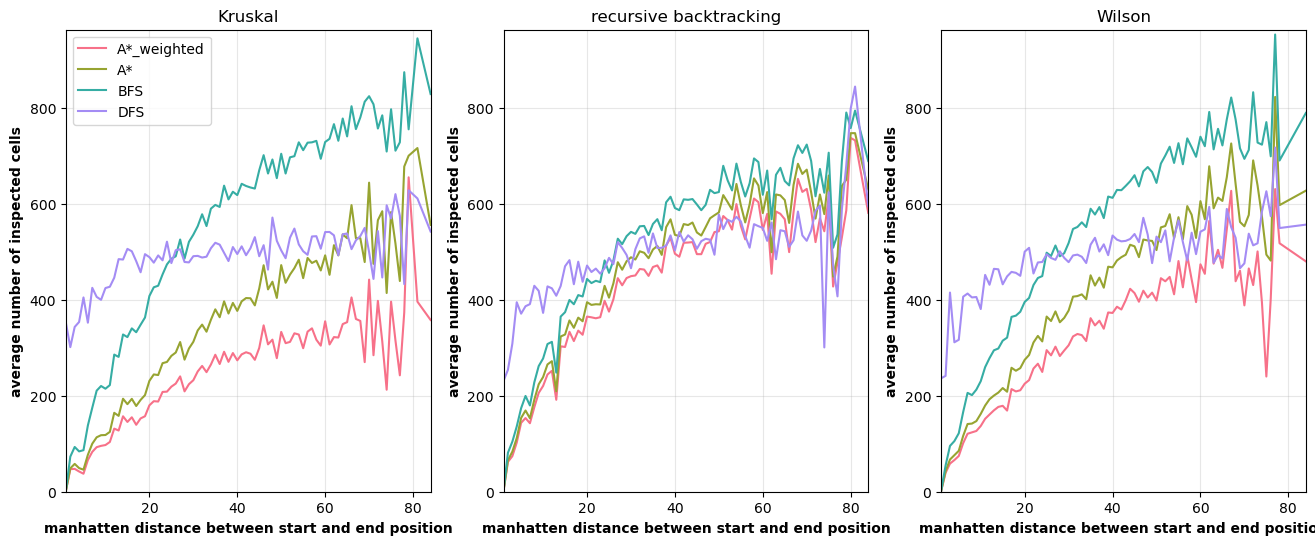

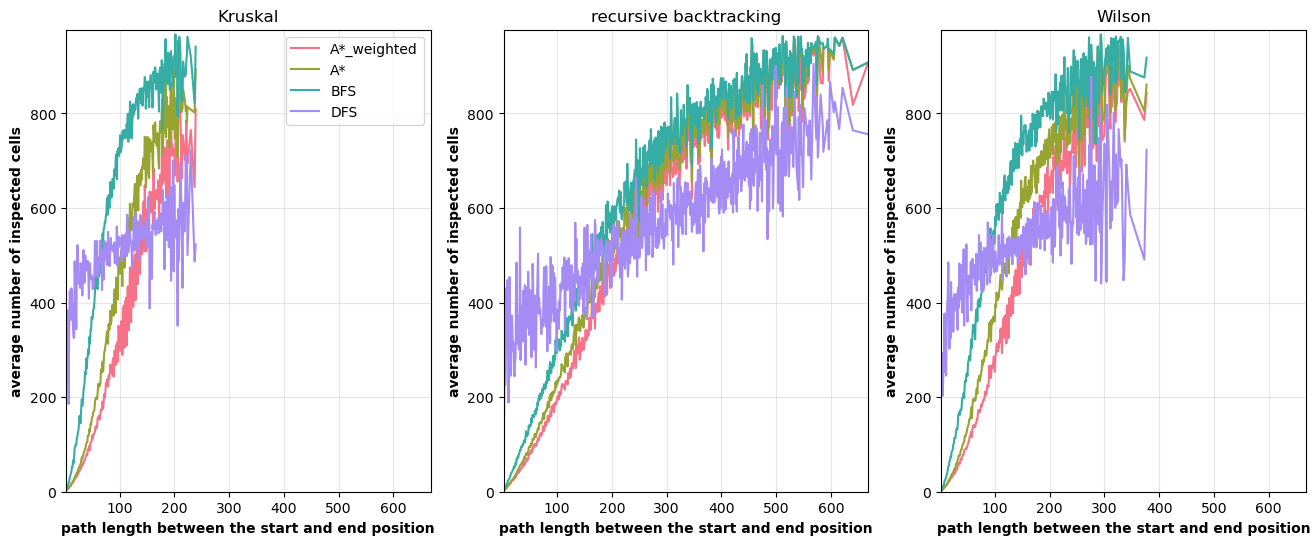

In [7]:
# We want a color palette to distinguish the different solving algorithms.
clrs = sns.color_palette("husl", len(solving_algorithms))

# Compare two different approaches. The first is to compare the number of inspected cells with the manhattan distance
# between the start and end position and the second one is to compare the number of inspected cells with the path length.
column_names = ["manhattan_distance", "path_length"]
x_labels = ["manhatten distance between start and end position", "path length between the start and end position"]

for idx_x, column_name in enumerate(column_names):
    fig, axes = plt.subplots(1, len(generation_algorithms), figsize=(16,6))
    y_max = 0 # for equal y ranges.
    for idx_gen, generation_algorithm in enumerate(generation_algorithms):
        ax = axes[idx_gen]
        # Filter only the current generation algorithm.
        df_generation_algorithm = df[df["generation_algorithm"] == generation_algorithm]
        # For all solving algorithms, calculate the statistic and plot it.
        for idx_sol, solving_algorithm in enumerate(solving_algorithms):
            # Calculate average and standard deviation
            df_stats = df_generation_algorithm.groupby(column_name)[solving_algorithm].agg(['mean']).reset_index()
            y_max = max(y_max, df_stats["mean"].max())
            ax.plot(df_stats[column_name], df_stats["mean"], c=clrs[idx_sol], label=solving_algorithm)
        label_weight = "bold"
        ax.set_title(generation_algorithm)
        ax.set_xlabel(x_labels[idx_x], weight=label_weight)
        ax.set_ylabel("average number of inspected cells", weight=label_weight)
        xlim = [min(df[column_name]), max(df[column_name])]
        ax.set_xlim(xlim)
        ax.grid(alpha=0.3)
        if idx_gen == 0:
            ax.legend()
    # Set equal y ranges.
    for ax in axes:
        ax.set_ylim([0, y_max + 10])
    plt.show()
    fig.savefig("./analysis_" + column_name + "_" + benchmark_name + ".png", bbox_inches="tight")